In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filelocation = "C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf=pd.read_csv(filelocation)
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
#visadf.select_dtypes
#visadf.columns
#visadf.info()
dftypes=visadf.dtypes
dict_dftype=dict(dftypes)
dict_dftype
categorical_cols=[i for i in dict_dftype  if dict_dftype[i] == 'object']
numerical_cols=[i for i in dict_dftype  if dict_dftype[i] != 'object']
print(categorical_cols)
print(numerical_cols)


visadf.select_dtypes(exclude='object')
visadf.select_dtypes(include='object')

['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
['no_of_employees', 'yr_of_estab', 'prevailing_wage']


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,South,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,West,Year,Y,Certified


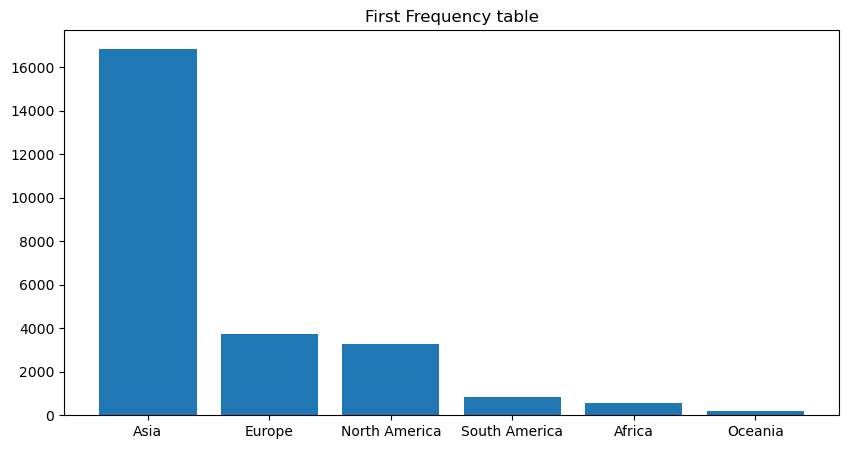

In [4]:
continentsdf=dict(visadf['continent'].value_counts())
#visadf['continent'].value_counts(normalize=True)
continentsdf

xaxis=list(continentsdf.keys())
yaxis=list(continentsdf.values())

plt.figure(figsize=(10,5))
plt.title("First Frequency table")
plt.bar(xaxis,yaxis,data=visadf['continent'])
plt.show()


<Axes: xlabel='continent', ylabel='count'>

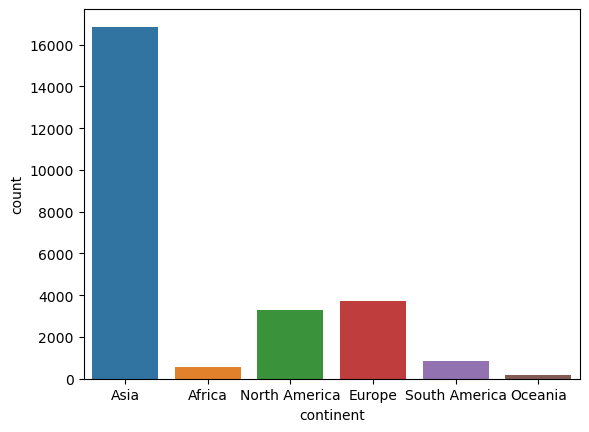

In [5]:
sns.countplot(data=visadf,x='continent') 

In [6]:
swage=visadf['prevailing_wage']
print(swage.mean())
print(swage.median())

74455.81459209183
70308.20999999999


In [7]:
numerical_cols=visadf.select_dtypes(exclude='object').columns
#print(numerical_cols[0])
#print(numerical_cols[1])
#print(numerical_cols[2])
dict1={}
for i in range(len(numerical_cols)):
    mean=visadf[numerical_cols[i]].mean()
    median=visadf[numerical_cols[i]].median()
    std=visadf[numerical_cols[i]].std()
    minmum=visadf[numerical_cols[i]].min()
    maxmum=visadf[numerical_cols[i]].max()
    p25 = np.percentile(visadf[numerical_cols[i]],25)
    p50 = np.percentile(visadf[numerical_cols[i]],50)
    p75 = np.percentile(visadf[numerical_cols[i]],75)
    lst=[mean,median,std,minmum,maxmum,p25,p50,p75]
    dict1[numerical_cols[i]]=lst
     
indexLst= ['mean','median','std','minimum','maxmum','p25','p50','p75'] 
    
modnumdf=pd.DataFrame(dict1,index=indexLst)
    
modnumdf
    

,no_of_employees,yr_of_estab,prevailing_wage
mean,5667.043210,1979.409929,74455.814592
median,2109.000000,1997.000000,70308.210000
std,22877.928848,42.366929,52815.942327
minimum,-26.000000,1800.000000,2.136700
maxmum,602069.000000,2016.000000,319210.270000
p25,1022.000000,1976.000000,34015.480000
p50,2109.000000,1997.000000,70308.210000
p75,3504.000000,2005.000000,107735.512500


In [8]:
visadf.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
type(swage)
np.percentile(swage,25)
np.quantile(swage,0.25)

34015.479999999996

<BarContainer object of 3 artists>

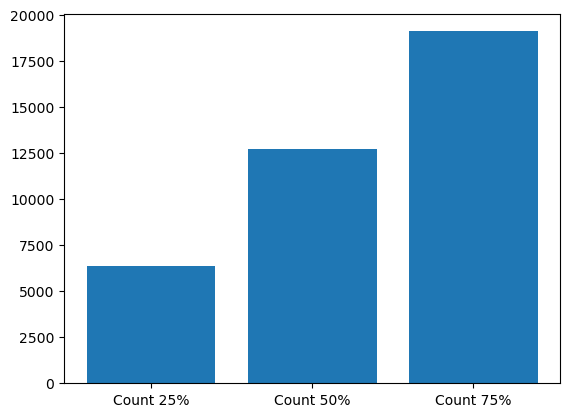

In [10]:
pwage=visadf['prevailing_wage']
#print(np.percentile(pwage,25))
count25=len(pwage[pwage<np.percentile(pwage,25)])
count50=len(pwage[pwage<np.percentile(pwage,50)])
count75=len(pwage[pwage<np.percentile(pwage,75)])
yaxis=[count25,count50,count75]
xaxis=['Count 25%','Count 50%','Count 75%']
modpd=pd.DataFrame(zip(xaxis,yaxis),columns=['Percentile','count'])
plt.bar(xaxis,yaxis,data=modpd)


In [11]:
pwage=visadf['prevailing_wage']
pwage25=np.percentile(pwage,25)
condition = pwage<pwage25
visadf[condition]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


(array([ 2992.,  3863.,  4868.,  6038.,  7280.,  8714., 10099., 11542.,
        12986., 14431., 15888., 17223., 18491., 19708., 20796., 21774.,
        22581., 23226., 23735., 24108., 24372., 24516., 24621., 24732.,
        24839., 24938., 25026., 25105., 25170., 25234., 25292., 25345.,
        25378., 25411., 25440., 25459., 25466., 25469., 25475., 25480.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.7930

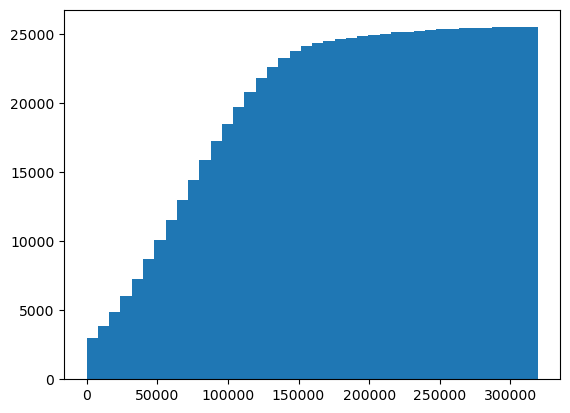

In [12]:
plt.hist(pwage,bins=40,cumulative=True)

In [15]:
pwage=visadf['prevailing_wage']
q1=np.quantile(pwage,0.25)
q2=np.quantile(pwage,0.50)
q3=np.quantile(pwage,0.75)
iqr=q3-q1
upperbound=q3+1.5*iqr
lowerbound=q1-1.5*iqr

condition1=pwage>upperbound
condition2=pwage<lowerbound
outliersdf=visadf[condition1|condition2]

condition1=pwage<upperbound
condition2=pwage>lowerbound
nonOutliersdf=visadf[condition1&condition2]

print(len(outliersdf))
print(len(nonOutliersdf))

427
25053


{'whiskers': [<matplotlib.lines.Line2D at 0x1d990c3f550>,
 'caps': [<matplotlib.lines.Line2D at 0x1d990c3e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d990c3ff90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d990c3ced0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d990c3c710>],
 'means': []}

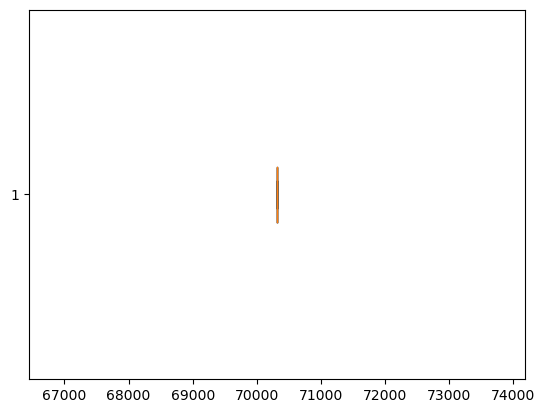

In [20]:
#fixing the outliers using the median
filelocation = "C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf=pd.read_csv(filelocation)
pwage=visadf['prevailing_wage']
q1=np.quantile(pwage,0.25)
q2=np.quantile(pwage,0.50)
q3=np.quantile(pwage,0.75)
iqr=q3-q1
upperbound=q3+1.5*iqr
lowerbound=q1-1.5*iqr

condition1=pwage>upperbound
condition2=pwage<lowerbound
outliersdf=visadf[condition1|condition2]

condition1=pwage<upperbound
condition2=pwage>lowerbound
median = visadf['prevailing_wage'].median()
visadf['prevailing_wage']=np.where(condition1|condition2,median,visadf['prevailing_wage'])
plt.boxplot(visadf['prevailing_wage'],vert=False)
 
